In [13]:
from collections import defaultdict
import matplotlib.pyplot as plt

 Salários e Experiência
 Você já está saindo para o almoço quando o vice-presidente de
 Relações Públicas lhe pede alguns fatos curiosos sobre os salários
 dos cientistas de dados. Esse tópico é sensível, no entanto, ele lhe
 fornece um conjunto de dados anônimos contendo o salary (o
 salário de cada usuário, em dólares) e o tenure (a experiência como
 cientista de dados, em anos):

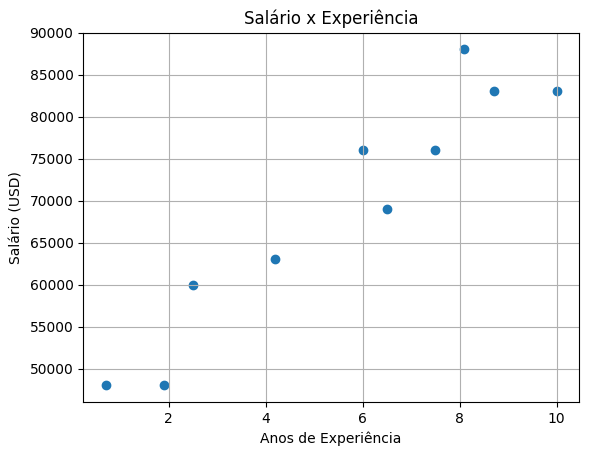

In [14]:
salaries_and_tenures = [
    (83000, 8.7), (88000, 8.1),
    (48000, 0.7), (76000, 6),
    (69000, 6.5), (76000, 7.5),
    (60000, 2.5), (83000, 10),
    (48000, 1.9), (63000, 4.2)
]
# Separar os dados em listas de X e Y
salaries = [salary for salary, tenure in salaries_and_tenures]
tenures = [tenure for salary, tenure in salaries_and_tenures]

# Plotar
plt.scatter(tenures, salaries)
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário (USD)")
plt.title("Salário x Experiência")
plt.grid(True)
plt.show()

Certamente, os mais experientes tendem a ganhar melhor,
 entretanto como isso pode se tornar um fato curioso? Primeiro, você
 analisa a média salarial por anos de experiência:

In [15]:
from collections import defaultdict

# As chaves são anos; os valores são listas de salários por anos de experiência.
salary_by_tenure = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

# As chaves são anos; cada valor é o salário médio associado ao número de anos de experiência.
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}


 Essa informação não parece muito útil, já que os usuários não têm
 os mesmos anos de experiência, ou seja, só os seus salários
 individuais são indicados:

Talvez seja melhor fazer buckets de experiências:

In [16]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"


Em seguida, agrupamos os salários correspondentes a cada
 bucket:

In [17]:
# As chaves são buckets de anos de experiência; os valores são listas de salários.
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)


 E, finalmente, computamos a média salarial de cada grupo:

In [18]:
# As chaves são buckets de anos de experiência; os valores são a média salarial do bucket.
average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}


 O resultado é mais interessante:

In [19]:
{'between two and five': 61500.0, 'less than two': 48000.0, 'more than five': 79166.67}


{'between two and five': 61500.0,
 'less than two': 48000.0,
 'more than five': 79166.67}